# Post-proc simulation results

Load hdf files, prepare them for post-processing.

Outputs from simulations (hdf files) provide modal displacements values. A conversion to "real" displacements
is required.


In [23]:
# Reload automatically all python modules before each cell exec
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# standard python packages
import sys
import time
import os
from model_tools import load_model, load_convert_and_save
# visu
import matplotlib.pyplot as plt
import scipy.io
import h5py
from simulation_campaigns import transfer_data, get_job_duration
%matplotlib inline
import numpy as np

## Get list of remote files
and transfer if required

* Creates remote_data dictionnary which contains list of files to post-process
* Creates transfer.sh file to be executed to transfer (scp) files (h5) from remote server 


In [25]:
import pickle
import subprocess
#pkl_file = open('campaign_new_0612.pkl', 'rb')
pkl_file = open('campaign_2018.pkl', 'rb')
remote_data = pickle.load(pkl_file)
transfer_data(remote_data)
# execute file transfer.sh to get h5 files


False ./results_bass_2018/F_100000_id_4075703/single_e0.5_999_100000.h5
False ./results_bass_2018/F_10000_id_4075702/single_e0.5_999_10000.h5
False ./results_bass_2018/F_1000000_id_4075704/single_e0.5_999_1000000.h5
False ./results_bass_2018/F_100000000_id_4075706/single_e0.5_999_100000000.h5
False ./results_bass_2018/F_5000_id_4075701/single_e0.5_999_5000.h5
False ./results_bass_2018/F_10000000_id_4075705/single_e0.5_999_10000000.h5
False ./results_bass_2018/F_100000_id_4075697/single_e0.0_999_100000.h5
False ./results_bass_2018/F_10000000_id_4075699/single_e0.0_999_10000000.h5
False ./results_bass_2018/F_5000_id_4075695/single_e0.0_999_5000.h5
False ./results_bass_2018/F_10000_id_4075696/single_e0.0_999_10000.h5
False ./results_bass_2018/F_100000000_id_4075700/single_e0.0_999_100000000.h5
False ./results_bass_2018/F_1000000_id_4075698/single_e0.0_999_1000000.h5
False ./results_bass_2018/F_10000000_id_4075711/single_e1.0_999_10000000.h5
False ./results_bass_2018/F_100000_id_4075709/si

In [26]:
name ='bass_one_c_0.0'
campaigns = remote_data
local_dir = remote_data['results_paths'][1]

In [ ]:
for freq in  campaigns[name]:
    target_name = os.path.join(local_dir, campaigns[name][freq][4])
    conver_name = os.path.join(local_dir, campaigns[name][freq][5])
    print(target_name)
    print(conver_name)
    do_transfer = (not os.path.exists(target_name)) and (not os.path.exists(conver_name))
    print(do_transfer)

In [ ]:
 os.path.exists("./results_bass_2018/F_62720_id_4915260/single_e0.0_999_62720.h")

In [ ]:
datas = remote_data['bass_one_c_0.0']
for freq in datas:
    pathname = os.path.dirname(datas[freq][5])
    buff = os.path.basename(datas[freq][5])
    res = buff.split('e1.0')
    newbuff = res[0] + 'e0.0' + res[1]
    print(newbuff)
    datas[freq][5] = os.path.join(pathname, newbuff)
    print(datas[freq][5])
    

In [ ]:
remote_data['bass_one_c_0.0'] = datas

In [ ]:
outp = open('campaign_2018.pkl', 'wb')
pickle.dump(remote_data, outp)
outp.close()

## Create 'converted' files

In [4]:
# List available campaigns
for name in remote_data:
    print(name)

one_contact_2018_0.5
results_paths
one_contact_2018_0.0
one_contact_2018_1.0
bass_2018_0.0
bass_2018_0.9
bass_2018_1.0
fretless_2018_0.0
fretless_2018_0.9
fretless_2018_1.0
one_contact_2018_2_1.0
bass_full_2018_0.0
bass_full_2018_0.9
fretless_full_2018_0.0
fretless_full_2018_0.9
bass_full_2018_1.0
fretless_full_2018_1.0
one_contact_2018_2_0.9
bass_full_012018_1.0
bass_012018_0.0
bass_012018_1.0
fretless_012018_0.0
bass_full_012018_0.0
fretless_full_012018_t1_1.0
fretless_012018_t1_1.0
fretless_012018_t2_1.0
fretless_full_012018_t2_1.0
bass_one_c_0.0
bass_one_c_1.0
bass_one_c_0.9
fretless_full_012018_t3_1.0
fretless_full_012018_1.0
fretless_012018_t3_1.0
fretless_012018_1.0
fretless_full_012018_0.0
bass_22012018_0.0


In [27]:
# Set path to matlab inputs
#matlab_bass = './bass_guitar/pb2'
#matlab_fretless = './fretless_bass_guitar/bsf'
results_path = remote_data['results_paths'][1]
for name in remote_data:
    campaign = remote_data[name]
    #if name.find('bass') >= 0:
    if name.find('results_path') < 0:
        for freq in campaign:
            restit = campaign[freq][3]
            file = os.path.join(results_path, campaign[freq][4])
            convfile = os.path.join(results_path, campaign[freq][5])
            if(not os.path.exists(convfile)):
                print(file, convfile)
                #print(name)
                
                #load_convert_and_save(file)
                
    #elif name.find('fretless') >= 0:
    #    for freq in campaign:
    #        restit = campaign[freq][3]
    #        file = os.path.join(results_path, campaign[freq][4])
    #        convfile = os.path.join(results_path, campaign[freq][5])
    #        if(not os.path.exists(convfile)):
    #            load_convert_and_save(file)

./results_bass_2018/F_2048000_id_4915286/fretless_e0.0_862_2048000.h5 ./results_bass_2018/F_2048000_id_4915286/converted_fretless_e0.0_862_2048000.h5
./results_bass_2018/F_2048000_id_4955029/bass_e0.0_862_2048000.h5 ./results_bass_2018/F_2048000_id_4955029/converted_bass_e0.0_862_2048000.h5


Load model from file ./results_bass_2018/F_2048000_id_4955029/bass_e0.0_862_2048000.h5
Write new 'converted' file ./results_bass_2018/F_2048000_id_4955029/converted_bass_e0.0_862_2048000.h5


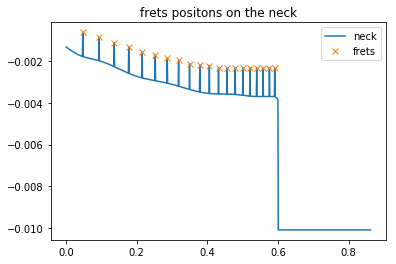

In [28]:
fname = './results_bass_2018/F_2048000_id_4955029/bass_e0.0_862_2048000.h5'
load_convert_and_save(fname)

In [ ]:
load_model(fname)

In [ ]:
matlab_bass = './bass_guitar/pb2'
matlab_fretless = './fretless_bass_guitar/bsf'

In [ ]:
file = './Results_new_bass_0612/F_32768000_id_3882603/converted_g_862_32768000.h5'
h5file = h5py.File(file, 'r+')
print(h5file.attrs['restit'])
h5file.close()

In [ ]:
# Set path to matlab inputs
for name in remote_data:
    campaign = remote_data[name]
    if name.find('results_paths') < 0:
        for freq in campaign:
            restit = campaign[freq][3]
            file = os.path.join(results_path, campaign[freq][4])
            convfile = os.path.join(results_path, campaign[freq][5])   
            if os.path.exists(convfile):
                print(convfile)
                h5file = h5py.File(convfile, 'r+')
                h5file.attrs['restit'] = restit
                print(h5file.attrs['restit'])
                h5file.close()

In [ ]:
# Check frets output parameter 
for name in campaign_bass:
    filelist = campaign_bass[name]['files']
    for i in range(len(filelist)):
        
        if os.path.exists(filelist[i]):
            print(filelist[i])
            h5file = h5py.File(filelist[i], 'r+')
            h5file.attrs['frets output'] = 'light'
            print(h5file.attrs['frets output'])
            h5file.close()

In [ ]:
filename = './results_bass_1812/F_10000.0_id_4073973/single_e0.0_999_10000.h5'

In [ ]:
filename.replace('999', '862')

In [ ]:
import subprocess

In [ ]:
def rename(filename):
    #for file in files:
    dirname = os.path.dirname(file)
    currentname = 'single' + os.path.basename(filename).split('one_contact')[1]
    current = os.path.join(dirname, currentname)
    cmd = 'cp ' + current + ' ' + filename
    if not os.path.exists(filename):
        subprocess.call(cmd)
    return cmd

In [ ]:
files = remote_data['one_contact0.0']
files

In [ ]:
names = [name for name in remote_data.keys() if name.find('one_contact') >=0]
for name in names:
    campaign = remote_data[name]
    #if name.find('bass') >= 0:
    for freq in campaign:
        file = os.path.join(results_path, campaign[freq][4])
        convfile = os.path.join(results_path, campaign[freq][5])
        #if(not os.path.exists(convfile)):
        #    load_convert_and_save(file)
        print(rename(file))

